In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer 

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('Recsys_2015.csv', low_memory = False, delimiter =',')
df.head()

,Buy_sesID,Cli_ItemID,ttl_Cli,AVG_CLI,Item_CLI,Fre_Cli_Itm,IN_Fre_Ctg,Cli_Wd,Cli_T,Dur_Sec,Cli_buy,Item_bought_P90,Fir_Cli,Las_Cli,Item_avg_pric,AVG_Pric,Pri_ctg_P90,Pred_Target
0,10000004,214853090.0,8.0,2.0,3.0,1,1,Friday,2,3117.0,3,1,1,1,4188.0,1736.301466,1779.0,1
1,10000004,214853094.0,8.0,2.0,1.0,0,1,Friday,2,0.0,1,1,0,0,4188.0,1736.301466,1779.0,0
2,10000004,214851326.0,8.0,2.0,3.0,1,1,Friday,2,255.0,3,1,0,0,1046.0,1736.301466,1779.0,1
3,10000004,214853248.0,8.0,2.0,1.0,0,0,Friday,2,0.0,1,1,0,0,837.0,2141.647947,2617.0,0
4,10000024,214510445.0,4.0,1.0,1.0,0,1,Sunday,1,0.0,1,1,1,1,8377.0,2141.647947,2617.0,1


In [3]:
df['Cli_Wd'] = df['Cli_Wd'].astype(str).map (lambda x:1 if ('Mon' in x)
                                            else 2 if ('Tues' in x)
                                            else 3 if ('Wed' in x)
                                            else 4 if ('Thur' in x)
                                            else 5 if ('Fri' in x)
                                            else 6 if ('Sat' in x)
                                            else 7  )

In [4]:
df['below_ctg_avg_pric'] = df.apply(lambda x:1 if x.Item_avg_pric <= x.AVG_Pric
                                                else 0, axis = 1).astype(np.float64)

df['below_ctg_P90'] = df.apply(lambda x:1 if x.Item_avg_pric <= x.Pri_ctg_P90
                                          else 0, axis = 1).astype(np.float64)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253460 entries, 0 to 253459
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Buy_sesID           253460 non-null  int64  
 1   Cli_ItemID          253458 non-null  float64
 2   ttl_Cli             253458 non-null  float64
 3   AVG_CLI             253458 non-null  float64
 4   Item_CLI            253458 non-null  float64
 5   Fre_Cli_Itm         253460 non-null  int64  
 6   IN_Fre_Ctg          253460 non-null  int64  
 7   Cli_Wd              253460 non-null  int64  
 8   Cli_T               253460 non-null  int64  
 9   Dur_Sec             253458 non-null  float64
 10  Cli_buy             253460 non-null  int64  
 11  Item_bought_P90     253460 non-null  int64  
 12  Fir_Cli             253460 non-null  int64  
 13  Las_Cli             253460 non-null  int64  
 14  Item_avg_pric       237977 non-null  float64
 15  AVG_Pric            253452 non-nul

In [6]:
y = df['Pred_Target'].tolist()
df.drop(['Buy_sesID','Pred_Target'],axis=1,inplace=True )
X = df.to_numpy()

In [7]:
#https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

# demonstrate data normalization with sklearn
# create scaler
scaler = MinMaxScaler()
# fit and transform in one step
normalized = scaler.fit_transform(X)
# inverse transform
X = scaler.inverse_transform(X)

In [8]:
# demonstrate data standardization with sklearn
# create scaler
scaler = StandardScaler()
# fit and transform in one step
standardized = scaler.fit_transform(X)
# inverse transform
X= scaler.inverse_transform(X)

In [9]:
imputer = SimpleImputer(strategy = "median")

imputer.fit(X)
X = imputer.transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
target = to_categorical(y_train)
predictors = X_train
n_cols = predictors.shape[1]

In [12]:
model = Sequential()
model.add(Dense (32,activation='softmax', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(predictors,target, 
          epochs = 10)

predictions =model.predict(X)

predicted_prob_true = predictions[:,1]

print(predicted_prob_true)

Epoch 1/10
5545/5545 [==============================] - 3s 543us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 2/10
5545/5545 [==============================] - 3s 537us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 3/10
5545/5545 [==============================] - 3s 531us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 4/10
5545/5545 [==============================] - 3s 526us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 5/10
5545/5545 [==============================] - 3s 524us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 6/10
5545/5545 [==============================] - 3s 533us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 7/10
5545/5545 [==============================] - 3s 524us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 8/10
5545/5545 [==============================] - 3s 526us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 9/10
5545/5545 [==============================] - 3s 529us/step - loss: 0.6900 - accuracy: 0.5401
Epoch 10/10
5545/5545 [==============================] - 3s 540u

## Pipeline

### Breast Cancer Wisconsin dataset

    - 569 sample of malignant(M) and benign(B) tumor cells.
    - it contains 30 features that have been computed from cell images 

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M','B'])

array([1, 0])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [18]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

Test Accuracy: 0.947


## k-fold cross-validation 

In [19]:
# use iris dataset to fit a linear SVM
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape


((150, 4), (150,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)


clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print(clf.score(X_test, y_test))

(90, 4) (90,)
(60, 4) (60,)
0.9666666666666667


In [21]:
## k-fold cross-validation on the same dataset with linear SVM
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)


[0.96666667 1.         0.96666667 0.96666667 1.        ]


In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


## Model evaluation with training and testing curves

In [30]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [37]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=1)

pipe_lr = Pipeline([
            ('scl', StandardScaler()),
            ('clf', LogisticRegression(
                        penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                          X=X_train,
                                          y=y_train,
                                          train_sizes=np.linspace(0.1, 1.0, 10),
                                          cv=10,
                                          n_jobs=3)
#https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

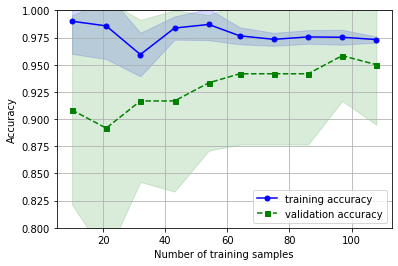

In [38]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5,
         label='training accuracy')
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [39]:
from sklearn.model_selection import validation_curve

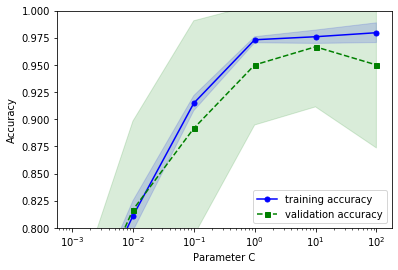

In [40]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                            estimator=pipe_lr,
                            X=X_train,
                            y=y_train,
                            param_name='clf__C',
                            param_range=param_range,
                            cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5,
        label='training accuracy')
plt.fill_between(param_range,
                 train_mean + train_std,
                 train_mean - train_std,
                 color='blue', alpha=0.15)
plt.plot(param_range, test_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                color='green', alpha=0.15)
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

## Grid Search

In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,
              'clf__kernel': ['linear']},
             {'clf__C': param_range,
             'clf__gamma': param_range,
             'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,
                 param_grid=param_grid,
                 scoring='accuracy',
                 cv=10,
                 n_jobs=2)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9749999999999999
{'clf__C': 10.0, 'clf__kernel': 'linear'}


In [43]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test,y_test))

Test accuracy: 0.967


In [44]:
!pip install keras